In [14]:
##
## Summary: In the education industry, high schools prep students for the next chapter in his/her life. 
##    Viewing university statistics and massachusetts high school statistics, 
##    do patterns exist to show patterns between acceptance rates, SAT scores and demographics?
##    
##    The first dataset is:
##        
##        
##        
##    The second dataset is:
##        
##        

#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#Import the first dataset (Massachusetts high school)
mshs=pd.read_csv('../data/external/MA_Public_Schools_2017.csv')

#Import the second dataset (University data)
univ=pd.read_json('../data/external/schoolInfo.json')


In [15]:
#Cleaning up MA school data

#Removing irrelevant data... function, contact name(4), address 1&2 (5,6), state(),phone, fax, 
#Function: column 4----No unique values
#Contact name: column 5--- not irrelevant in detecting acceptance to universities
#Address 1 & 2: column 6,7---also not irrelevant. Can generalize by town.
#State:col 9---all MA
#Phone and Fax:col 10,11---also not irrelevant

mshsFinal=mshs.drop(columns=['Function','Contact Name','Address 1','Address 2','State','Phone','Fax','PK_Enrollment','K_Enrollment', '1_Enrollment','2_Enrollment','3_Enrollment','4_Enrollment','5_Enrollment','6_Enrollment','7_Enrollment', '8_Enrollment'])

#Remove all non high schools
mshsFinal=mshsFinal[mshsFinal['12_Enrollment'] > 0]

#Remove all rows without SAT data
mshsFinal=mshsFinal.dropna(subset=['SAT_Tests Taken'])

#Output MA Public School data....
mshsFinal

,School Code,School Name,School Type,Town,Zip,Grade,District Name,District Code,9_Enrollment,10_Enrollment,...,MCAS_10thGrade_English_Incl. in SGP(#),Accountability and Assistance Level,Accountability and Assistance Description,School Accountability Percentile (1-99),Progress and Performance Index (PPI) - All Students,Progress and Performance Index (PPI) - High Needs Students,District_Accountability and Assistance Level,District_Accountability and Assistance Description,District_Progress and Performance Index (PPI) - All Students,District_Progress and Performance Index (PPI) - High Needs Students
0,10505,Abington High,Public School,Abington,2351,"09,10,11,12",Abington,10000,124,109,...,111.0,Level 1,Meeting gap narrowing goals,42.0,76.0,75.0,Level 3,One or more schools in the district classified...,63.0,60.0
8,50505,Agawam High,Public School,Agawam,1001,"09,10,11,12",Agawam,50000,299,309,...,263.0,Level 2,Not meeting gap narrowing goals,41.0,65.0,61.0,Level 2,One or more schools in the district classified...,54.0,56.0
16,70505,Amesbury High,Public School,Amesbury,1913,"09,10,11,12",Amesbury,70000,147,138,...,133.0,Level 2,Not meeting gap narrowing goals,53.0,67.0,66.0,Level 2,One or more schools in the district classified...,50.0,46.0
17,70515,Amesbury Innovation High School,Public School,Amesbury,1913,"09,10,11,12",Amesbury,70000,7,2,...,NaN,Insufficient data,NaN,NaN,NaN,NaN,Level 2,One or more schools in the district classified...,50.0,46.0
23,90505,Andover High,Public School,Andover,1810,"09,10,11,12",Andover,90000,446,459,...,310.0,Level 2,Not meeting gap narrowing goals,81.0,85.0,64.0,Level 2,One or more schools in the district classified...,83.0,57.0
33,100505,Arlington High,Public School,Arlington,2476,"09,10,11,12",Arlington,100000,332,350,...,264.0,Level 1,Meeting gap narrowing goals,73.0,79.0,86.0,Level 2,One or more schools in the district classified...,76.0,56.0
43,140505,Ashland High,Public School,Ashland,1721,"09,10,11,12",Ashland,140000,202,172,...,164.0,Level 1,Meeting gap narrowing goals,89.0,94.0,88.0,Level 2,One or more schools in the district classified...,72.0,73.0
49,160515,Attleboro Community Academy,Public School,Attleboro,2703,"09,10,11,12",Attleboro,160000,0,14,...,NaN,Insufficient data,NaN,NaN,NaN,NaN,Level 2,One or more schools in the district classified...,64.0,52.0
50,160505,Attleboro High,Public School,Attleboro,2703,"09,10,11,12",Attleboro,160000,449,401,...,370.0,Level 2,Not meeting gap narrowing goals,30.0,75.0,65.0,Level 2,One or more schools in the district classified...,64.0,52.0
60,170505,Auburn Senior High,Public School,Auburn,1501,"PK,09,10,11,12",Auburn,170000,174,197,...,161.0,Level 2,Not meeting gap narrowing goals,45.0,67.0,72.0,Level 2,One or more schools in the district classified...,57.0,53.0


In [3]:
#Cleaning up university data....


#Output university data
univ

,acceptance-rate,act-avg,aliasNames,businessRepScore,city,cost-after-aid,displayName,engineeringRepScore,enrollment,hs-gpa-avg,...,rankingType,region,sat-avg,schoolType,sortName,state,tuition,urlName,xwalkId,zip
0,7.0,32.0,None,NaN,Princeton,16793.0,Princeton University,4.1,5400.0,3.9,...,national-universities,NaN,1400.0,national-universities,princetonuniversity,NJ,47140,princeton-university,186131,8544
1,5.0,32.0,None,NaN,Cambridge,16338.0,Harvard University,3.6,6710.0,4.0,...,national-universities,NaN,1430.0,national-universities,harvarduniversity,MA,48949,harvard-university,166027,2138
2,8.0,32.0,UChicago,NaN,Chicago,27767.0,University of Chicago,NaN,5941.0,4.0,...,national-universities,NaN,1450.0,national-universities,universityofchicago,IL,54825,university-of-chicago,144050,60637
3,6.0,32.0,None,NaN,New Haven,18385.0,Yale University,3.4,5472.0,NaN,...,national-universities,NaN,1420.0,national-universities,yaleuniversity,CT,51400,yale-university,130794,6520
4,6.0,32.0,None,NaN,New York,21041.0,Columbia University,3.8,6113.0,NaN,...,national-universities,NaN,1430.0,national-universities,columbiauniversity,NY,57208,columbia-university,190150,10027
5,8.0,33.0,MIT,4.6,Cambridge,20331.0,Massachusetts Institute of Technology,4.9,4524.0,NaN,...,national-universities,NaN,1460.0,national-universities,massachusettsinstituteoftechnology,MA,49892,mit,166683,2139
6,5.0,31.0,None,NaN,Stanford,19296.0,Stanford University,4.8,7034.0,NaN,...,national-universities,NaN,1380.0,national-universities,stanforduniversity,CA,49617,stanford,243744,94305
7,9.0,32.0,UPenn,4.8,Philadelphia,25441.0,University of Pennsylvania,3.6,10019.0,3.9,...,national-universities,NaN,1380.0,national-universities,universityofpennsylvania,PA,53534,university-of-pennsylvania,215062,19104
8,11.0,31.0,None,NaN,Durham,23374.0,Duke University,3.7,6609.0,NaN,...,national-universities,NaN,1380.0,national-universities,dukeuniversity,NC,53744,duke-university,198419,27708
9,8.0,34.0,CalTech Cal Tech,NaN,Pasadena,23973.0,California Institute of Technology,4.6,979.0,NaN,...,national-universities,NaN,1510.0,national-universities,californiainstituteoftechnology,CA,49908,cal-tech,110404,91125


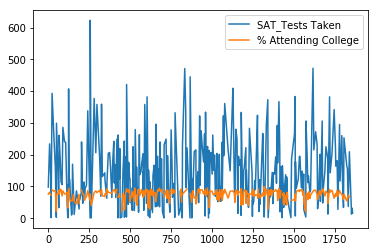

In [12]:
#Start exploring data

#print table of percentage SAT vs % went to college
mshsPercentSAT=mshsFinal.copy()

mshsPercentSAT=mshsPercentSAT.loc[:,['SAT_Tests Taken','% Attending College']]
mshsPercentSAT.plot()